# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
combined_mouse_study_data["Mouse ID"].nunique()


249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_data

array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_g989 = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID'] == 'g989']
dup_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dup_data = combined_mouse_study_data[combined_mouse_study_data["Mouse ID"].isin(dup_data) == False]
clean_dup_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [53]:
# Checking the number of mice in the clean DataFrame.
clean_dup_data["Mouse ID"].nunique()

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Creating Dataframe

drug_reg_stats = pd.DataFrame({"Mean Tumor Volume": mean_stats,
                               "Median Tumor Volume": median_stats,
                               "Tumor Volume Variance": variance_stats,
                               "Tumor Volume Std. Dev.": std_dev_stats,
                               "Tumor Volume Std. Err.": std_err_stats})

drug_reg_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stats_aggregate = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stats_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [56]:
#define total number of timepoints administered to mouse for each regimen drug 
count_mouse_reg = combined_mouse_study_data["Drug Regimen"].value_counts()
count_mouse_reg

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

In [57]:
#listing the available drugs
drug_reg = combined_mouse_study_data["Drug Regimen"].unique()
drug_reg

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

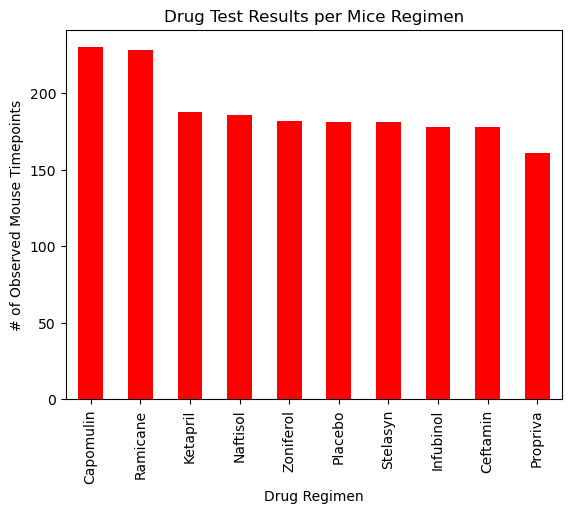

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_bar_chart = count_mouse_reg.plot.bar(color="red")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Test Results per Mice Regimen")
plt.show()

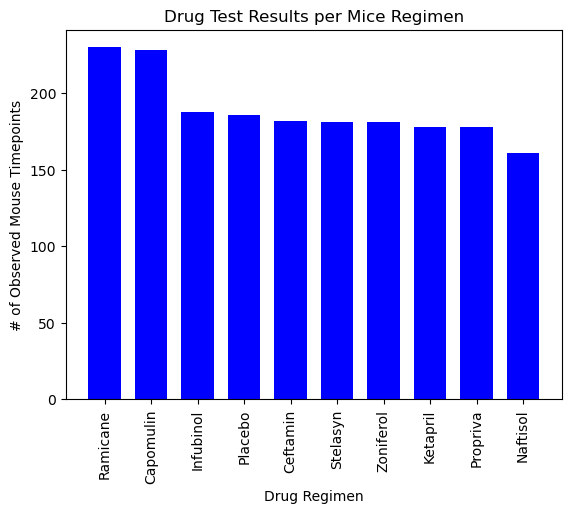

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_reg, count_mouse_reg, color ='blue', width = 0.7, align="center")

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Test Results per Mice Regimen")
plt.show()


In [60]:
#Define number of unique mouse with each associated with it's sex
gender_mouse = clean_dup_data["Sex"].value_counts()
gender_mouse

Sex
Male      958
Female    922
Name: count, dtype: int64

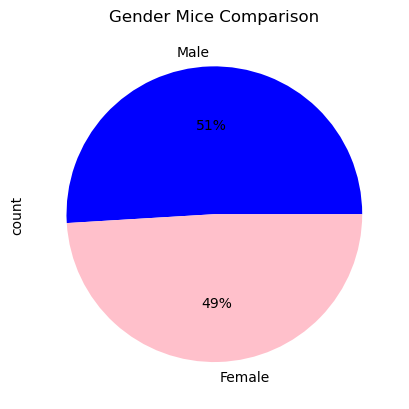

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

color = ['blue','pink']
plt.title("Gender Mice Comparison")
gender_mouse.plot.pie(autopct='%1.0f%%', colors=color)
plt.show()


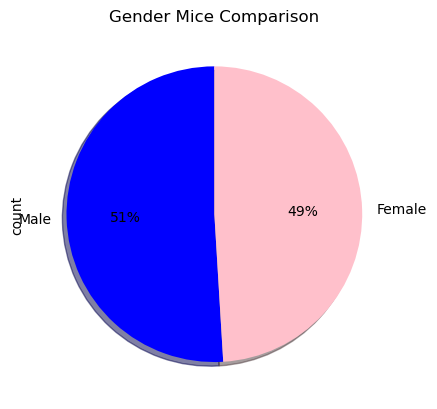

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ['Male', 'Female']
color = ['blue','pink']
plot_gender_chart_py = gender_mouse.plot.pie(autopct='%1.0f%%', colors=color, 
                                             labels=gender_label,shadow=True, startangle=90)
plt.title("Gender Mice Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


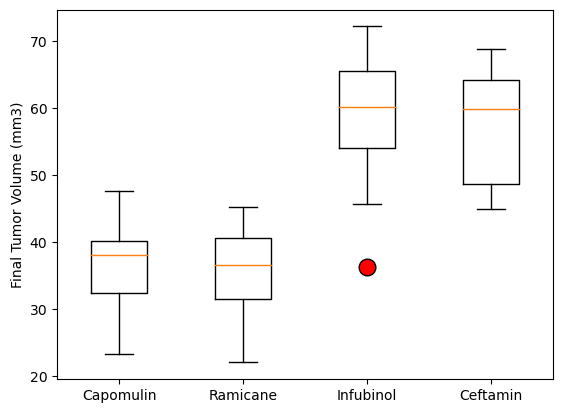

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

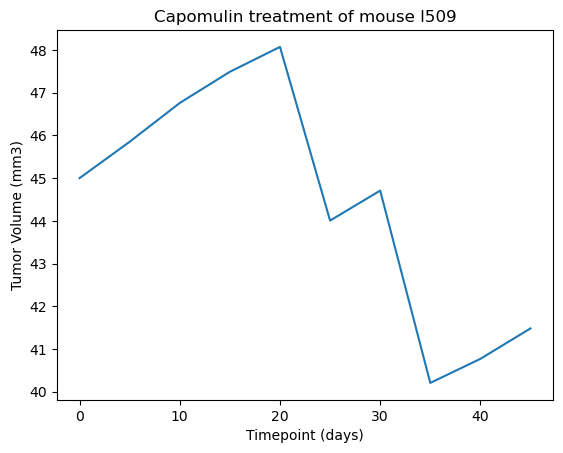

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


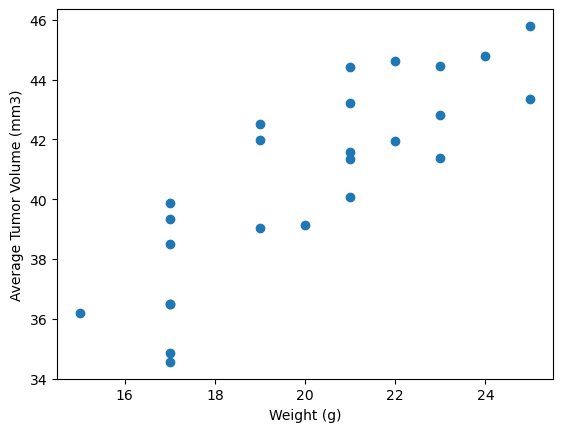

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


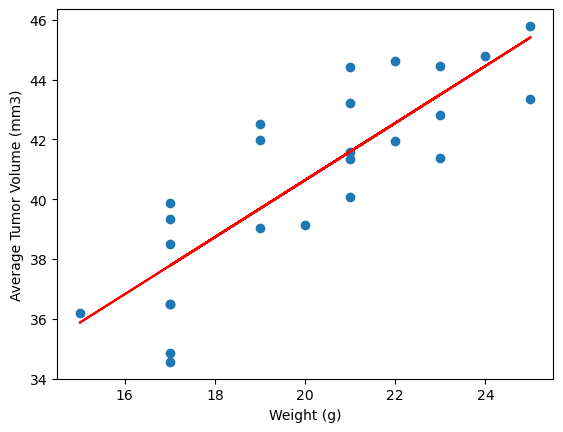

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
